<a href="https://colab.research.google.com/github/mounika2gottipati/Capstone-Project/blob/main/Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [10]:
from google.colab import files
uploaded = files.upload()


Saving EPA_Fuel_Economy.zip to EPA_Fuel_Economy (1).zip


In [27]:
import zipfile
import os

zip_path = "EPA_Fuel_Economy.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("EPA_Fuel_Economy")


In [28]:
path = "EPA_Fuel_Economy/*.xls*"

files = sorted(glob.glob(path))  # sort to keep correct year order
dfs = {}
years = list(range(2008, 2019))

for file, year in zip(files, years):
    df = pd.read_excel(file)
    dfs[year] = df
    print(f"Loaded {year}: {file}, Shape: {df.shape}")


Loaded 2008: EPA_Fuel_Economy/all_alpha_08.xls, Shape: (2404, 18)
Loaded 2009: EPA_Fuel_Economy/all_alpha_09.xls, Shape: (2561, 17)
Loaded 2010: EPA_Fuel_Economy/all_alpha_10.xls, Shape: (2326, 17)
Loaded 2011: EPA_Fuel_Economy/all_alpha_11.xlsx, Shape: (2171, 17)
Loaded 2012: EPA_Fuel_Economy/all_alpha_12.xlsx, Shape: (2252, 17)
Loaded 2013: EPA_Fuel_Economy/all_alpha_13.xlsx, Shape: (2397, 18)
Loaded 2014: EPA_Fuel_Economy/all_alpha_14.xlsx, Shape: (2517, 18)
Loaded 2015: EPA_Fuel_Economy/all_alpha_15.xlsx, Shape: (2653, 18)
Loaded 2016: EPA_Fuel_Economy/all_alpha_16.xlsx, Shape: (2589, 18)
Loaded 2017: EPA_Fuel_Economy/all_alpha_17.xlsx, Shape: (2589, 18)
Loaded 2018: EPA_Fuel_Economy/all_alpha_18 (1).xlsx, Shape: (2713, 18)


In [35]:
def analyze_year(df, year):
    print("\n" + "="*60)
    print(f"📌 EDA REPORT FOR YEAR: {year}")
    print("="*60)

    # Number of rows & columns
    print("\nShape:", df.shape)

    # Duplicate rows
    print("\nDuplicate rows:", df.duplicated().sum())

    # Datatypes
    print("\nDatatypes:")
    print(df.dtypes)

    # Missing values
    print("\nMissing values:")
    print(df.isnull().sum())

    # Unique value counts
    print("\nUnique values per feature:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")

    # Show unique values for categorical features (≤12 unique values)
    print("\nSmall categorical features (<=12 unique values):")
    for col in df.columns:
        if df[col].nunique() <= 12:
            print(f"\n--- {col} ---")
            print(df[col].value_counts())


In [36]:
for year, df in dfs.items():
    analyze_year(df, year)



📌 EDA REPORT FOR YEAR: 2008

Shape: (2404, 18)

Duplicate rows: 25

Datatypes:
Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

Missing values:
Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Ca

In [37]:
year_counts = {year: df.shape[0] for year, df in dfs.items()}
year_counts


{2008: 2404,
 2009: 2561,
 2010: 2326,
 2011: 2171,
 2012: 2252,
 2013: 2397,
 2014: 2517,
 2015: 2653,
 2016: 2589,
 2017: 2589,
 2018: 2713}

In [38]:
models_per_year = {year: df['Model'].nunique() for year, df in dfs.items()}
models_per_year


{2008: 436,
 2009: 473,
 2010: 495,
 2011: 507,
 2012: 520,
 2013: 547,
 2014: 587,
 2015: 629,
 2016: 607,
 2017: 634,
 2018: 652}

In [39]:
for year, df in dfs.items():
    print(f"\nYear {year} Fuel Types:")
    print(df['Fuel'].value_counts())



Year 2008 Fuel Types:
Fuel
Gasoline       2318
ethanol/gas      72
diesel           11
CNG               2
ethanol           1
Name: count, dtype: int64

Year 2009 Fuel Types:
Fuel
Gasoline       2387
ethanol/gas     141
diesel           30
CNG               2
Ethanol/Gas       1
Name: count, dtype: int64

Year 2010 Fuel Types:
Fuel
Gasoline       2123
Ethanol/Gas     137
Diesel           58
Hydrogen          4
Ethanol           2
CNG               2
Name: count, dtype: int64

Year 2011 Fuel Types:
Fuel
Gasoline                1866
Ethanol/Gas              180
Diesel                   103
Electricity               11
Hydrogen                   6
CNG                        4
Electricity/Gasoline       1
Name: count, dtype: int64

Year 2012 Fuel Types:
Fuel
Gasoline                1909
Ethanol/Gas              224
Diesel                    96
Electricity               12
Gasoline/Electricity       5
CNG                        4
CNG/Gasoline               2
Name: count, dtype: int64

Yea

In [40]:
df_all = pd.concat(dfs, ignore_index=True)
df_all.shape


(27172, 21)

In [41]:
df_all.columns = df_all.columns.str.strip().str.lower()
df_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27172 entries, 0 to 27171
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 27172 non-null  object 
 1   displ                 26891 non-null  float64
 2   cyl                   26483 non-null  object 
 3   trans                 26973 non-null  object 
 4   drive                 27079 non-null  object 
 5   fuel                  27172 non-null  object 
 6   sales area            19281 non-null  object 
 7   stnd                  27172 non-null  object 
 8   underhood id          27172 non-null  object 
 9   veh class             27172 non-null  object 
 10  air pollution score   27172 non-null  object 
 11  fe calc appr          2205 non-null   object 
 12  city mpg              25684 non-null  object 
 13  hwy mpg               25684 non-null  object 
 14  cmb mpg               25684 non-null  object 
 15  unadj cmb mpg      

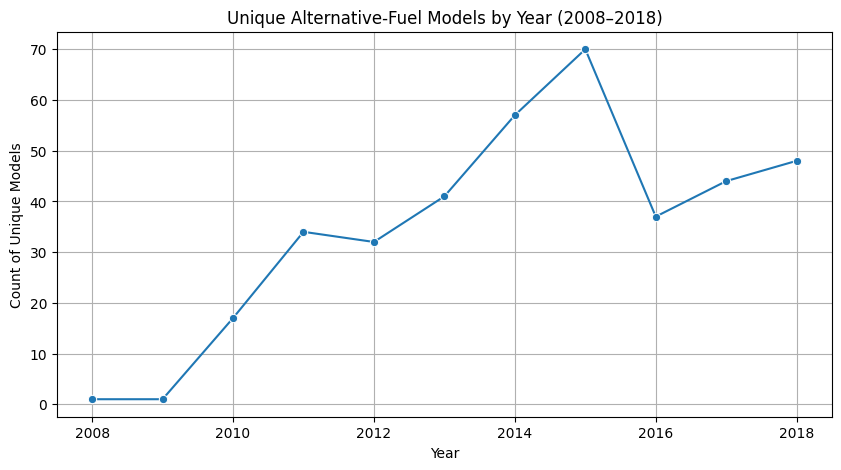

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_list = []
for year, df in dfs.items():

    df_copy = df.copy()
    df_copy['year'] = year
    df_list.append(df_copy)
df_all = pd.concat(df_list, ignore_index=True)

df_all.columns = df_all.columns.str.strip().str.lower()

df_all['year'] = df_all['year'].astype(int)

# Count unique models using alternative fuels
alt_fuels = ['Electricity', 'Diesel', 'E85', 'CNG', 'Hydrogen']


# Corrected column name from 'fuelType1' to 'fuel'
df_alt = df_all[df_all['fuel'].isin(alt_fuels)]
unique_alt = df_alt.groupby('year')['model'].nunique().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=unique_alt, x='year', y='model', marker='o')
plt.title("Unique Alternative-Fuel Models by Year (2008–2018)")
plt.xlabel("Year")
plt.ylabel("Count of Unique Models")
plt.grid(True)
plt.show()

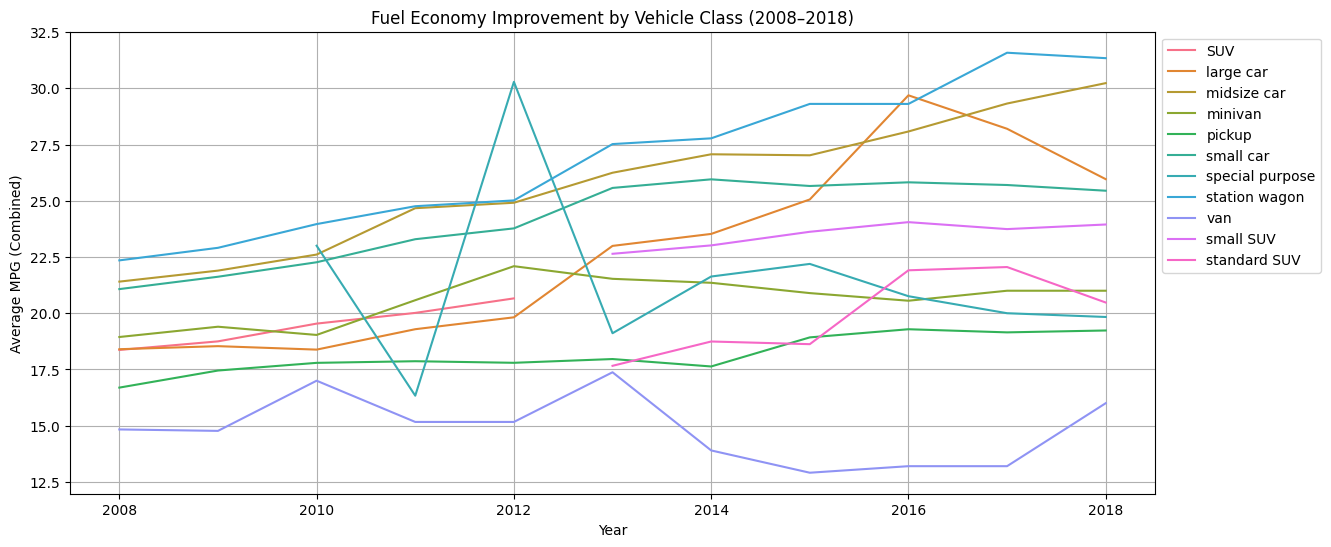

In [48]:
df_all['cmb mpg'] = pd.to_numeric(df_all['cmb mpg'], errors='coerce')
df_mpg = df_all.groupby(['year', 'veh class'])['cmb mpg'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=df_mpg, x='year', y='cmb mpg', hue='veh class')
plt.title("Fuel Economy Improvement by Vehicle Class (2008–2018)")
plt.xlabel("Year")
plt.ylabel("Average MPG (Combined)")
plt.legend(bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

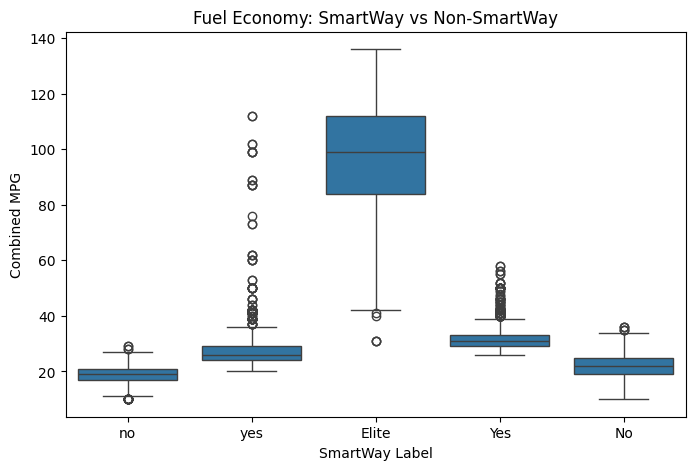

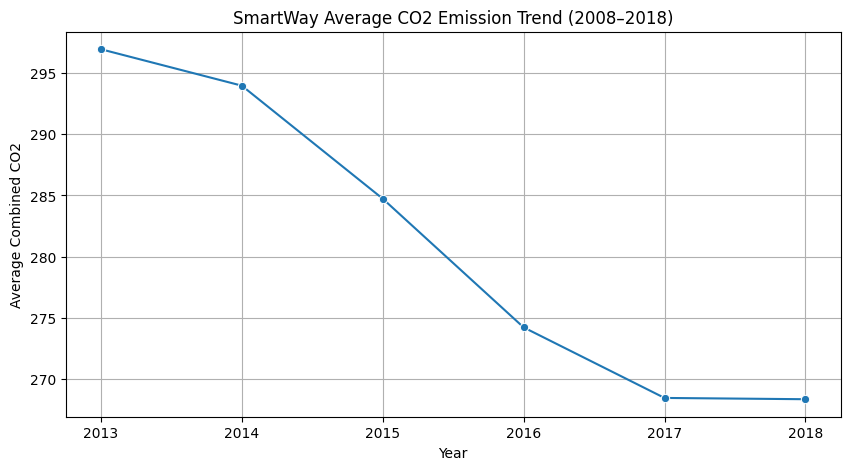

In [52]:
# SmartWay vs non-SmartWay MPG comparison
plt.figure(figsize=(8,5))
sns.boxplot(data=df_all, x='smartway', y='cmb mpg')
plt.title("Fuel Economy: SmartWay vs Non-SmartWay")
plt.xlabel("SmartWay Label")
plt.ylabel("Combined MPG")
plt.show()

# Convert 'comb co2' to numeric, coercing errors
df_all['comb co2'] = pd.to_numeric(df_all['comb co2'], errors='coerce')

# SmartWay GHG trend using the correct column 'comb co2'
smart_ghg = df_all[df_all['smartway'] == 'Yes'].groupby('year')['comb co2'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=smart_ghg, x='year', y='comb co2', marker='o')
plt.title("SmartWay Average CO2 Emission Trend (2008–2018)")
plt.xlabel("Year")
plt.ylabel("Average Combined CO2")
plt.grid(True)
plt.show()

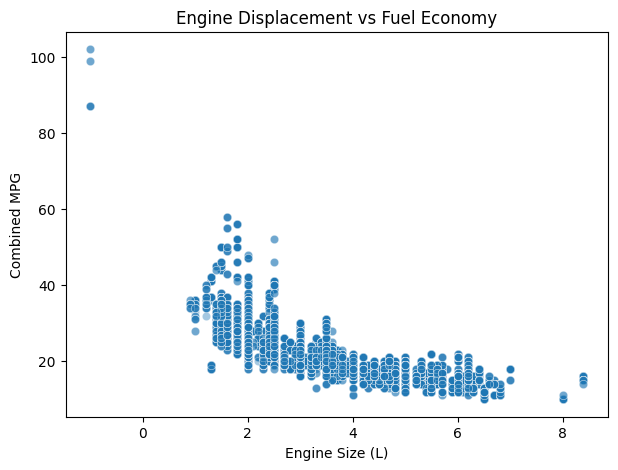

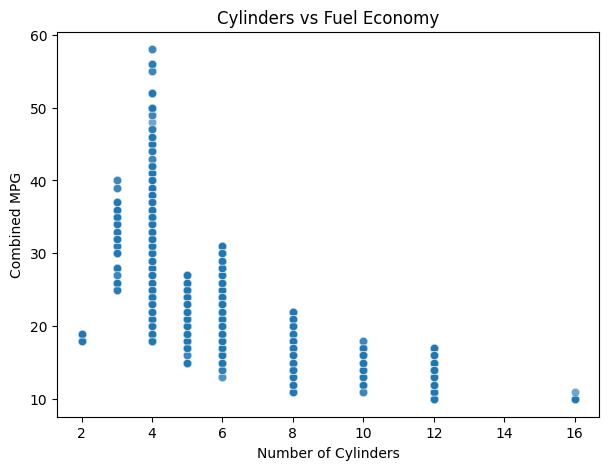

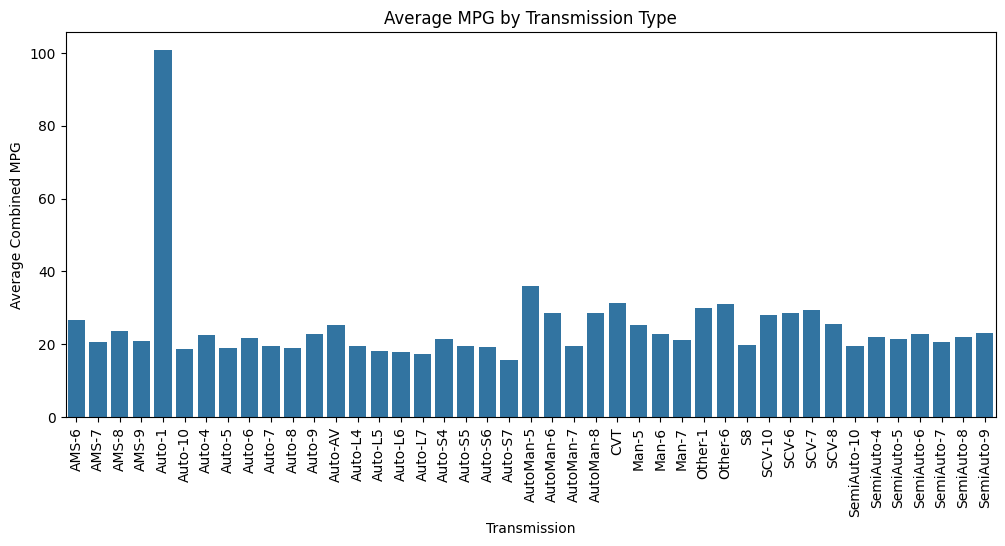

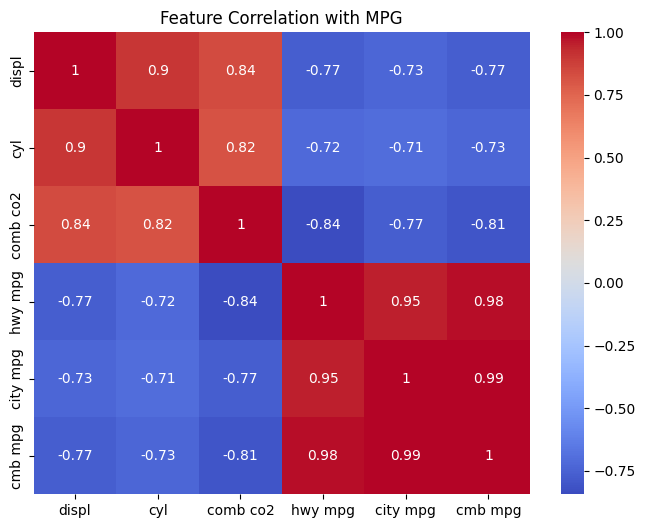

In [54]:
# Clean and convert relevant columns to numeric type
df_all['cyl'] = pd.to_numeric(df_all['cyl'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
df_all['city mpg'] = pd.to_numeric(df_all['city mpg'], errors='coerce')
df_all['hwy mpg'] = pd.to_numeric(df_all['hwy mpg'], errors='coerce')
df_all['cmb mpg'] = pd.to_numeric(df_all['cmb mpg'], errors='coerce')
df_all['comb co2'] = pd.to_numeric(df_all['comb co2'], errors='coerce')

# Scatter 1: Displacement vs MPG
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_all, x='displ', y='cmb mpg', alpha=0.4)
plt.title("Engine Displacement vs Fuel Economy")
plt.xlabel("Engine Size (L)")
plt.ylabel("Combined MPG")
plt.show()

# Scatter 2: Cylinders vs MPG
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_all, x='cyl', y='cmb mpg', alpha=0.4)
plt.title("Cylinders vs Fuel Economy")
plt.xlabel("Number of Cylinders")
plt.ylabel("Combined MPG")
plt.show()

# Bar: Transmission type vs MPG
df_trans = df_all.groupby('trans')['cmb mpg'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=df_trans, x='trans', y='cmb mpg')
plt.xticks(rotation=90)
plt.title("Average MPG by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Average Combined MPG")
plt.show()

# Correlation heatmap for numeric features
import numpy as np

numeric_df = df_all[['displ','cyl','comb co2','hwy mpg','city mpg','cmb mpg']]

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with MPG")
plt.show()

In [58]:
df["SmartWay"] = df["SmartWay"].replace({
    "Yes": 1,
    "Elite": 1,
    "No": 0,
    "No Label": 0
})


/tmp/ipython-input-1216622236.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["SmartWay"] = df["SmartWay"].replace({


In [64]:
# First, ensure all relevant columns in 'df' are numeric.
# Note: 'df' here refers to the last DataFrame from the 'dfs' dictionary (year 2018).

# Convert 'Cyl' to numeric, extracting digits from strings like '(6 cyl)'
df['Cyl'] = pd.to_numeric(df['Cyl'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')

# Function to parse MPG values that might contain '/' (e.g., '23/55')
def parse_mpg(mpg_str):
    if isinstance(mpg_str, str):
        if '/' in mpg_str:
            # Take the first number in case of 'X/Y' format
            return pd.to_numeric(mpg_str.split('/')[0], errors='coerce')
        else:
            return pd.to_numeric(mpg_str, errors='coerce')
    return mpg_str

df['City MPG'] = df['City MPG'].apply(parse_mpg)
df['Hwy MPG'] = df['Hwy MPG'].apply(parse_mpg)

# Ensure Air Pollution Score and Greenhouse Gas Score are numeric.
df['Air Pollution Score'] = pd.to_numeric(df['Air Pollution Score'], errors='coerce')
df['Greenhouse Gas Score'] = pd.to_numeric(df['Greenhouse Gas Score'], errors='coerce')


features = ["Displ", "Cyl", "Air Pollution Score", "Greenhouse Gas Score",
            "City MPG", "Hwy MPG", "Fuel", "Trans", "Veh Class"]

X = df[features]
y = df["SmartWay"]


In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

cat_cols = ["Fuel", "Trans", "Veh Class"]
num_cols = ["Displ", "Cyl", "Air Pollution Score", "Greenhouse Gas Score", "City MPG", "Hwy MPG"]

preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
], remainder="passthrough")


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
 'num_cols' and 'cat_cols' are available from previous cells.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')) # Impute missing numeric values with the mean
])


preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols), # Apply imputer to numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols) # Apply one-hot encoding to categorical columns
    ])

log_reg_model = Pipeline(
    [('prep', preprocess),
     ('model', LogisticRegression(max_iter=1000))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

log_reg_model.fit(X_train, y_train)
pred_lr = log_reg_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

Logistic Regression Accuracy: 0.9985272459499264
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       0.99      1.00      0.99        91

    accuracy                           1.00       679
   macro avg       0.99      1.00      1.00       679
weighted avg       1.00      1.00      1.00       679



In [68]:

target = "City MPG"

features_reg = ["Displ", "Cyl", "Fuel", "Trans", "Veh Class",
                "Greenhouse Gas Score", "Air Pollution Score"]

X = df[features_reg]
y = df[target]


In [69]:
preprocess_reg = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), ["Fuel","Trans","Veh Class"]),
], remainder="passthrough")


In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define numeric and categorical columns for the regression model
# Assuming features_reg from the previous cell is: ["Displ", "Cyl", "Fuel", "Trans", "Veh Class", "Greenhouse Gas Score", "Air Pollution Score"]
numeric_features_reg = [col for col in X.columns if X[col].dtype in ['float64', 'int64']]
categorical_features_reg = [col for col in X.columns if X[col].dtype == 'object']

# Create a numeric transformer with an imputer
numeric_transformer_reg = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')) # Impute missing numeric values with the mean
])

# Create a preprocessor for both numeric and categorical columns
preprocess_reg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_reg, numeric_features_reg),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_reg)
    ])

reg_model = Pipeline([
    ("prep", preprocess_reg),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

reg_model.fit(X_train, y_train)
pred = reg_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))


MAE: 0.636425999366436
R2 Score: 0.9877389186124341
